**DATA SCIENCE INTERN AT LETSGROWMORE**

**BEGINNER LEVEL TASK**

**IRIS FLOWER CLASSIFICATION ML PROJECT**

**HEMA DHARSHINI DK**

**IMPORT NECESSARY PACKAGES**

In [ ]:
import pandas as pd
import numpy as np

**LOAD THE DATA**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LGM/iris.csv')

In [ ]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**GIVING COLUMN NAME**

In [ ]:
column_name = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
data.to_csv('iris.csv',header=column_name , index=False)
data = pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**VIEWING THE COLUMN NAME**

In [ ]:
data.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [ ]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**CHEKING NULL VALUES**

In [ ]:
data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

**SPLITTING X AND Y**

In [ ]:
x = data.drop('Species',axis=1)
y = data['Species']

**SPLITTING TRAINING AND VALIDATION SET**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

**BUILD A MODEL USING DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=3,random_state=42)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**PLOTTING THE DECISION TREE**

In [ ]:
from sklearn import tree

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(30,10),facecolor='k')

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

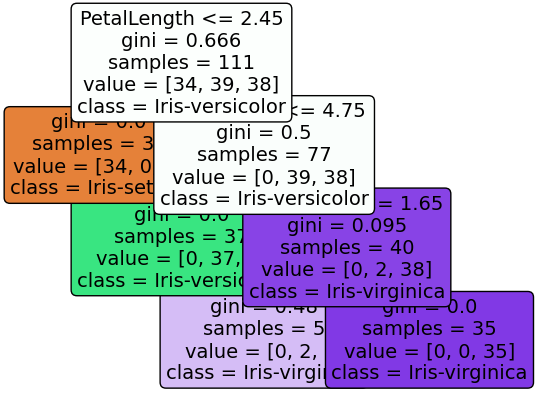

In [ ]:
feature_names = x.columns
labels = y.unique()
a = tree.plot_tree(model,feature_names=feature_names,class_names=labels,rounded=True,filled=True,fontsize=14)

In [ ]:
plt.show()

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(model,

                        feature_names = list(feature_names))

print(tree_rules)

|--- PetalLength <= 2.45
|   |--- class: Iris-setosa
|--- PetalLength >  2.45
|   |--- PetalLength <= 4.75
|   |   |--- class: Iris-versicolor
|   |--- PetalLength >  4.75
|   |   |--- PetalWidth <= 1.65
|   |   |   |--- class: Iris-virginica
|   |   |--- PetalWidth >  1.65
|   |   |   |--- class: Iris-virginica



In [ ]:
y_pred = model.predict(x_test)

**CHECKING THE ACCURACY**

In [ ]:
from sklearn import metrics

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
acc = accuracy_score(y_pred,y_test)
acc

0.868421052631579

**CONFUSION MATRIX**

In [ ]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[15,  0,  0],
       [ 0,  7,  1],
       [ 0,  4, 11]])

**CONFUSION MATRIX PLOT**

In [ ]:
matrix_df = pd.DataFrame(cm)

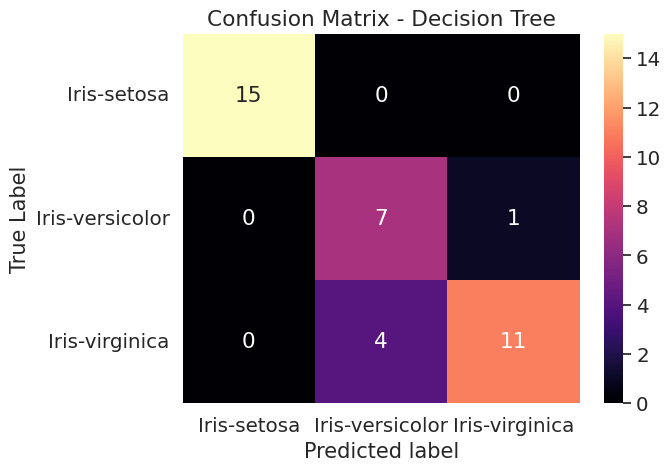

<Figure size 1000x700 with 0 Axes>

In [ ]:
ax = plt.axes()

sns.set(font_scale=1.3)

plt.figure(figsize=(10,7))

sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

ax.set_title('Confusion Matrix - Decision Tree')

ax.set_xlabel("Predicted label", fontsize =15)

ax.set_xticklabels(['']+labels)

ax.set_ylabel("True Label", fontsize=15)

ax.set_yticklabels(list(labels), rotation = 0)

plt.show()